In [35]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as mp
sns.set()
sns.set_theme()

In [16]:
df = pd.read_csv('data_market_prices.csv')

C:\Users\Lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105062 entries, 0 to 105061
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ad_id          105062 non-null  int64  
 1   city_id        105062 non-null  int64  
 2   category_id    105062 non-null  int64  
 3   market         77364 non-null   object 
 4   date_posted    105062 non-null  object 
 5   date_expired   105062 non-null  object 
 6   price_per_sqm  105035 non-null  float64
 7   price          105035 non-null  float64
 8   rooms_num      105004 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 7.2+ MB


In [22]:
df.describe()

,ad_id,city_id,category_id,price_per_sqm,price
count,1.049780e+05,104978.000000,104978.000000,104978.000000,1.049780e+05
mean,6.190297e+07,183.313990,108.562680,8545.700499,5.922340e+05
std,1.942707e+06,359.314097,25.992513,7700.378552,8.111824e+05
min,4.478563e+06,26.000000,101.000000,0.000000,1.000000e+00
25%,6.145340e+07,26.000000,101.000000,97.000000,1.200000e+04
50%,6.246774e+07,26.000000,101.000000,9355.000000,4.984600e+05
75%,6.276716e+07,26.000000,102.000000,12543.000000,7.200000e+05
max,6.293654e+07,1004.000000,202.000000,451000.000000,4.000000e+07


<AxesSubplot:>

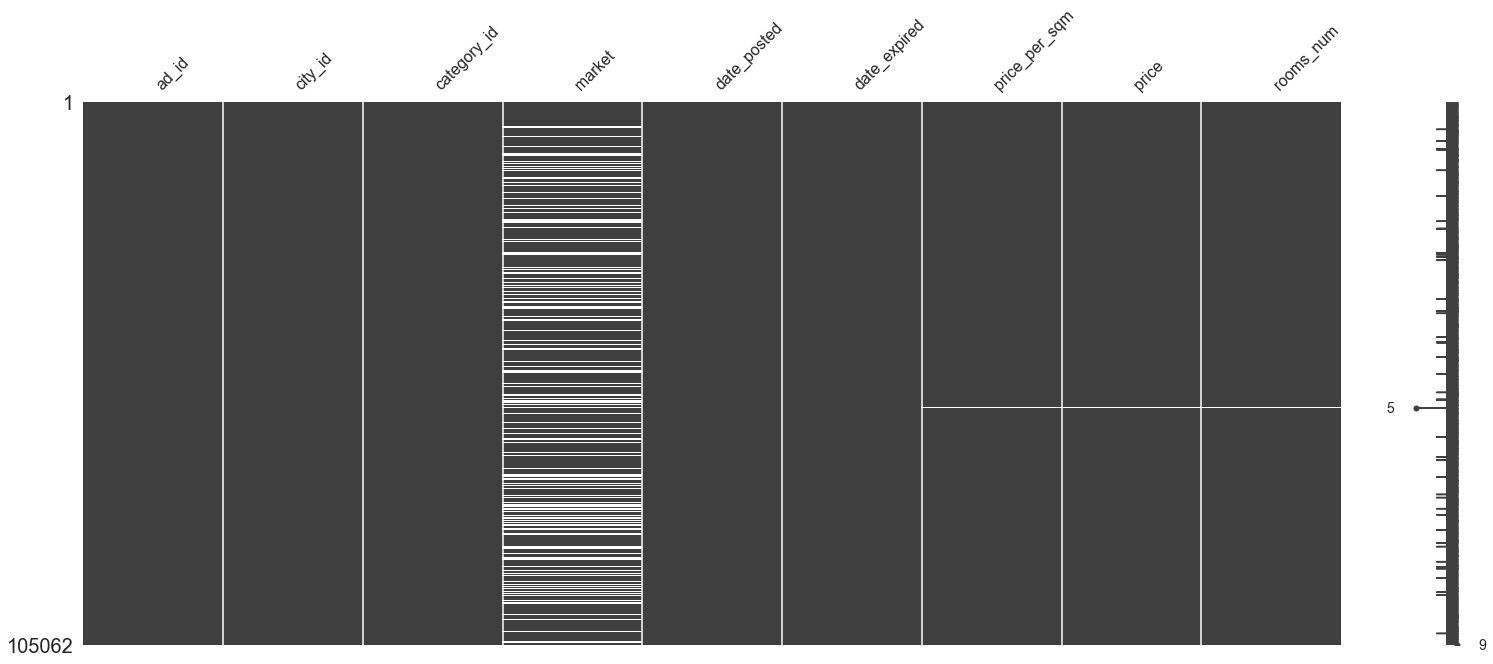

In [18]:
msno.matrix(df)

We can see to 4 features with missing data: price_per_sqm,price,rooms_num and market

In [19]:
# We candrop rows with missing  price_per_sqm,price,rooms_num case of a little amount of missing data and have no influence to
# to the final results
df= df.dropna( subset=['price_per_sqm','price','rooms_num'])

In [29]:
# find and drop duplicates
print(df.duplicated().value_counts())
df = df.drop_duplicates()

False    104960
True         18
dtype: int64


c

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104960 entries, 0 to 105061
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ad_id          104960 non-null  int64  
 1   city_id        104960 non-null  int64  
 2   category_id    104960 non-null  int64  
 3   market         77284 non-null   object 
 4   date_posted    104960 non-null  object 
 5   date_expired   104960 non-null  object 
 6   price_per_sqm  104960 non-null  float64
 7   price          104960 non-null  float64
 8   rooms_num      104960 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 8.0+ MB


In [21]:
df.market.value_counts()

secondary    45768
primary      31530
Name: market, dtype: int64

We have only two categories in market features, let's try to find some correlation or insight ties to market category

In [31]:
#drop all nans to find correlation
df_wtht_nans = df.dropna()

In [40]:
df_wtht_nans['market'] = pd.Categorical(df_wtht_nans['market'])
df_wtht_nans['market_code'] = df_wtht_nans['market'].cat.codes

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
df_wtht_nans.head()

,ad_id,city_id,category_id,market,date_posted,date_expired,price_per_sqm,price,rooms_num,market_code
2,62925670,26,101,primary,3/28/2022,5/12/2022,15968.0,1390000.0,3,0
3,62261719,1004,101,secondary,9/9/2021,3/4/2022,6743.0,499000.0,3,1
5,61969443,26,101,secondary,6/17/2021,6/9/2022,14007.0,997000.0,3,1
6,62569893,26,101,secondary,12/9/2021,2/15/2022,31238.0,2499000.0,3,1
7,62391825,26,101,primary,10/15/2021,6/12/2022,9790.0,600000.0,3,0


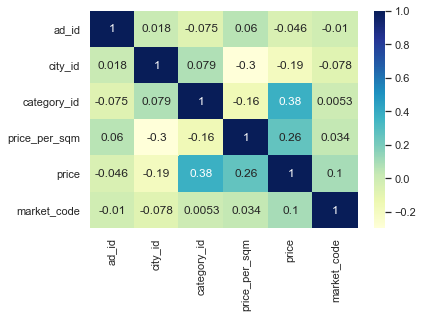

In [43]:
corr = df_wtht_nans.corr()
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True)
mp.show()